In [51]:
#Importing Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


# Data Collection and Processing

In [3]:
#Loading the Data

car_data = pd.read_csv('Data/car data.csv')

#Printing the head
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Checking the shape of the dataset
car_data.shape

(301, 9)

In [6]:
#Information of the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#Missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
#Checking the distribution of categorical column
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())
print(car_data.Car_Name.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


# Enoding the Categorial column

In [12]:
#Encoding "Fuel_Type"
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding "Seller_Type"
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding "Transmission"
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
#Splitting X and Y

X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [16]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [17]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [18]:
#Splitting tarining and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Model Training

# 1. Linear Regression

In [19]:
#Load LinearRegression Model
lin_reg_model = LinearRegression()

In [20]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [21]:
#Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [29]:
#R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error: ",error_score)

R Squared Error:  0.8799451660493705


Visualize the actual price and predicted prices 

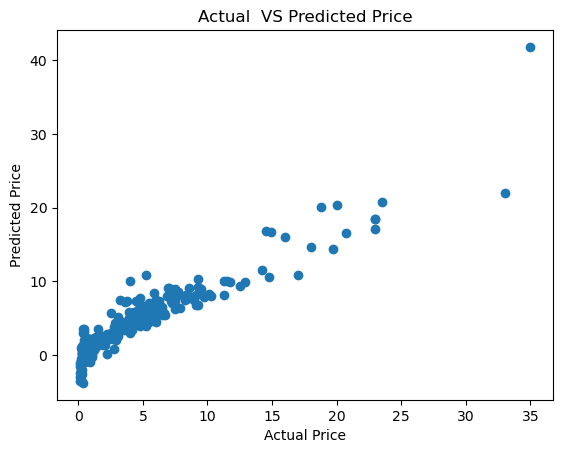

In [30]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()

In [31]:
#Prediction on Testing data
testing_data_prediction = lin_reg_model.predict(X_test)



In [32]:
#R Squared Error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R Squared Error: ",error_score)



R Squared Error:  0.836576671502687


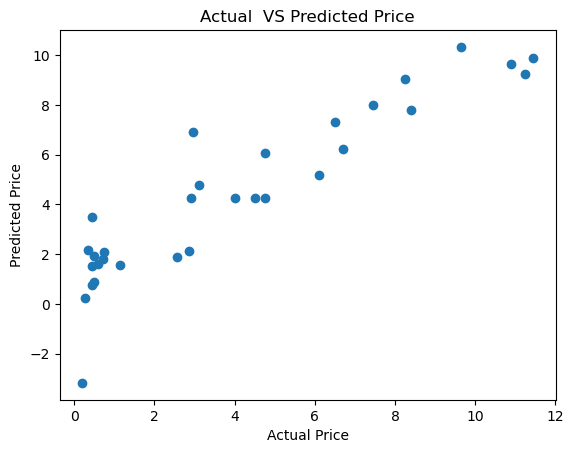

In [34]:
#Visualize the actual price and predicted prices 

plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()

# 2 Lasso Regression

In [40]:
#Load LassoRegression Model
lasso_reg_model = Lasso()


In [41]:
lasso_reg_model.fit(X_train, Y_train)


Lasso()

Model Evaluation

In [42]:
#Prediction on Training data
training_data_prediction = lasso_reg_model.predict(X_train)


In [43]:
#R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error: ",error_score)


R Squared Error:  0.8427856123435794


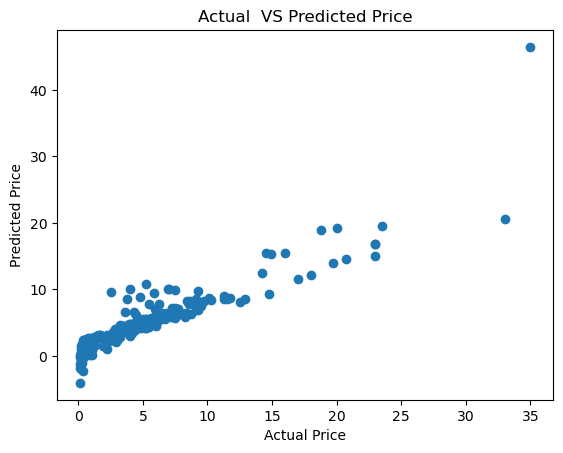

In [44]:
#Visualize the actual price and predicted prices 

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()



In [45]:
#Prediction on Testing data
testing_data_prediction = lasso_reg_model.predict(X_test)


In [46]:
#R Squared Error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R Squared Error: ",error_score)


R Squared Error:  0.8709167941173195


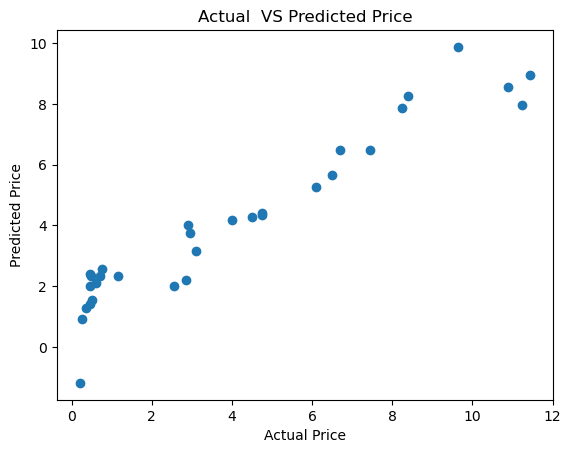

In [48]:
#Visualize the actual price and predicted prices 

plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()

# 3 Random Forest

In [52]:
#Load  Model Random Forest
rf_reg_model = RandomForestRegressor()

In [53]:
rf_reg_model.fit(X_train, Y_train)


RandomForestRegressor()

Model Evaluation

In [54]:
#Prediction on Training data
training_data_prediction = rf_reg_model.predict(X_train)



In [55]:
#R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error: ",error_score)



R Squared Error:  0.9869008565978493


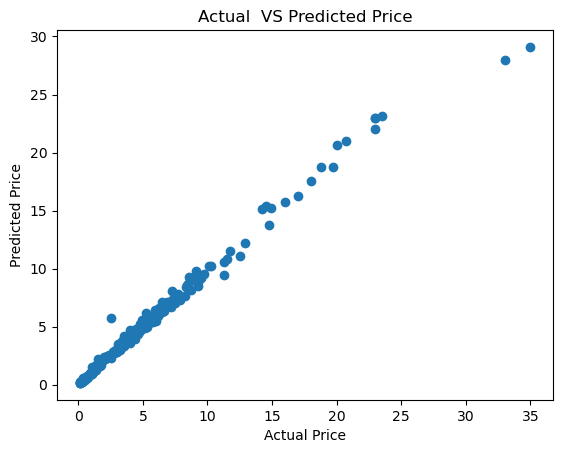

In [56]:
#Visualize the actual price and predicted prices 

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()



In [57]:
#Prediction on Testing data
testing_data_prediction = rf_reg_model.predict(X_test)


In [58]:
#R Squared Error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R Squared Error: ",error_score)


R Squared Error:  0.9799994409047708


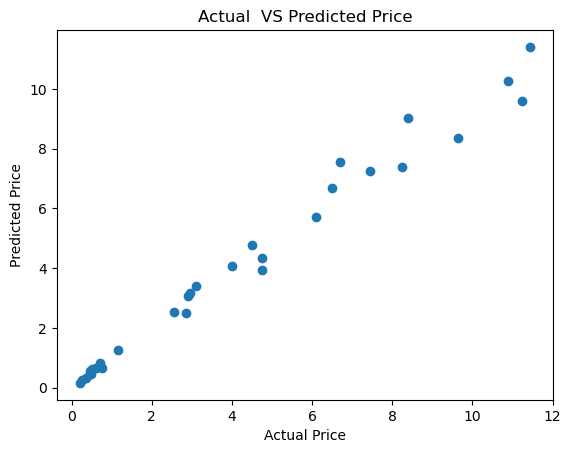

In [59]:
#Visualize the actual price and predicted prices 

plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()

# 4 GradientBoosting

In [60]:
#Load  Model Gradient Boosting Regressor
gb_reg_model = GradientBoostingRegressor()


In [61]:
gb_reg_model.fit(X_train, Y_train)


GradientBoostingRegressor()

Model Evaluation

In [62]:
#Prediction on Training data
training_data_prediction = gb_reg_model.predict(X_train)


In [63]:

#R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error: ",error_score)



R Squared Error:  0.9956442958815374


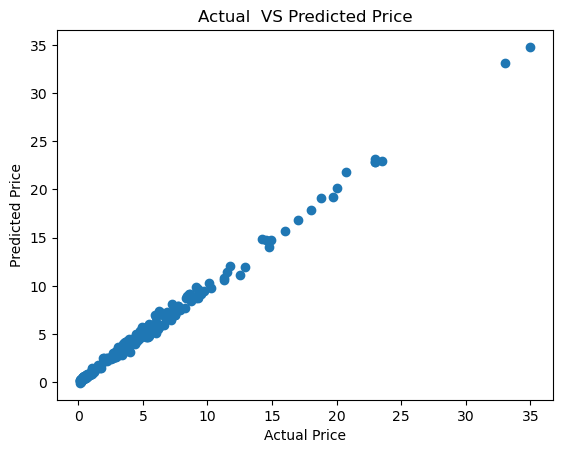

In [64]:


#Visualize the actual price and predicted prices 

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()



In [65]:


#Prediction on Testing data
testing_data_prediction = gb_reg_model.predict(X_test)



In [66]:

#R Squared Error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R Squared Error: ",error_score)



R Squared Error:  0.9808777091798008


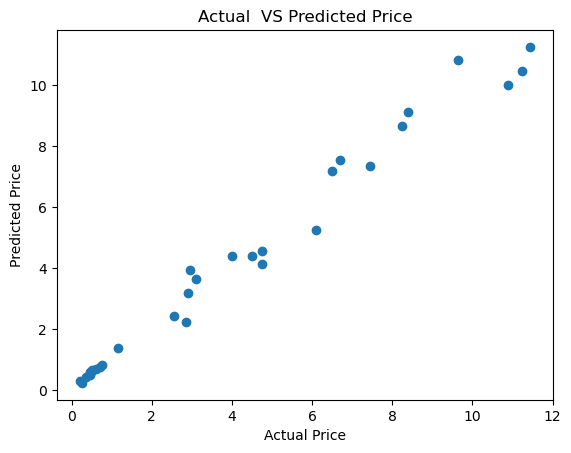

In [67]:

#Visualize the actual price and predicted prices 

plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()

# 5 Decision Tree 

In [68]:
#Load  Model Decision Tree 
dt_reg_model = DecisionTreeRegressor()


In [69]:
dt_reg_model.fit(X_train, Y_train)


DecisionTreeRegressor()

Model Evaluation

In [70]:
#Prediction on Training data
training_data_prediction = dt_reg_model.predict(X_train)


In [71]:

#R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error: ",error_score)


R Squared Error:  1.0


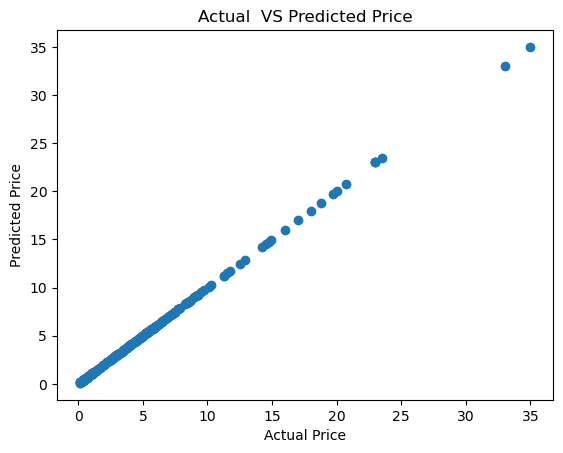

In [72]:
#Visualize the actual price and predicted prices 

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()





In [73]:
#Prediction on Testing data
testing_data_prediction = dt_reg_model.predict(X_test)


In [74]:
#R Squared Error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R Squared Error: ",error_score)


R Squared Error:  0.9532230520762767


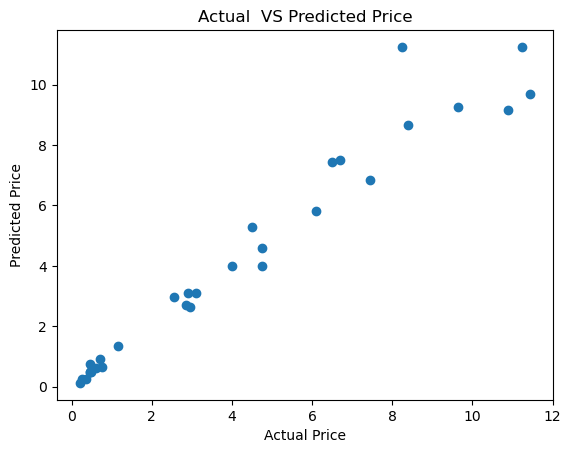

In [75]:
#Visualize the actual price and predicted prices 

plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  VS Predicted Price")
plt.show()